# Car Price Prediction

In this project, I'm trying to make a machine learning that will be able to provide a car price prediction. The features of the machine are wheel-base size, car's dimension (length, width, height), car's curb-weight, engine size , compression-ratio , city-mpg,  and highway-mpg. While the target is the car's price. I tested Linear Regression, Ridge, Lasso, and Elastic Net. Based on the Chi-Square tested, Elastic Net provides the best result among other algorithms tested. Nevertheless, there are so many area of imporvements that can be conducted to develop this model's performance such as hyperparameter tuning.

![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import dataset

In [2]:
df = pd.read_csv('Automobile_data.csv')

**quick look**

In [23]:
pd.set_option('display.max_columns', 50)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


### Data Cleansing and Preparation

**Check for Duplicates Data**

In [4]:
df.duplicated().sum() #No Duplicate Data

0

**Missing Values and Data Type**

In [5]:
df.info() #No null values, but data type still messy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [35]:
#We change the data type of price, bore, stroke, hourspower, and peak-rpm to numerical

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

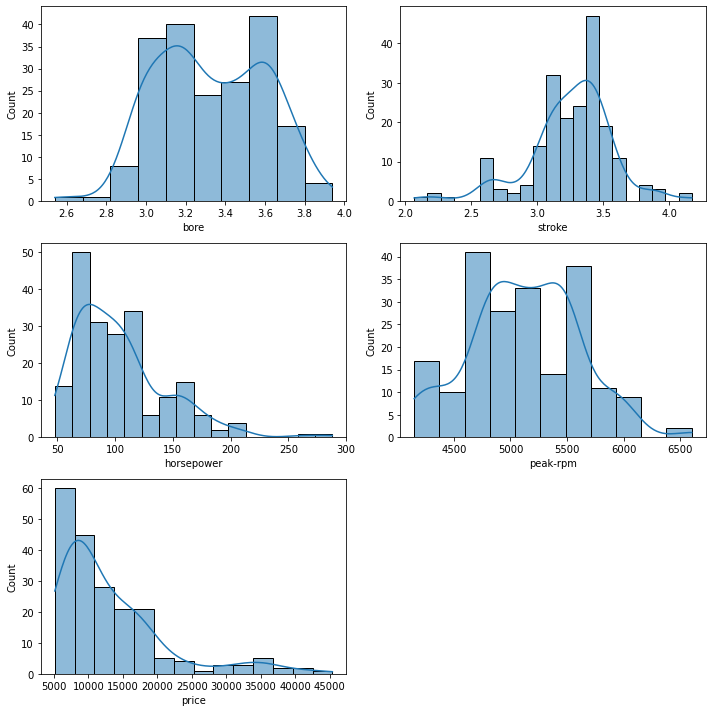

In [85]:
#Because of data type changing, some of values are missing. We will see the distribution of each variable.
#If the variable has a normal distribution, we use mean() to fill the missing value. Otherwise, we use mode() instead.

plt.figure(figsize=(10,10))
plt.subplot(321)
sns.histplot(data= df, x= 'bore', kde = 'True')
plt.subplot(322)
sns.histplot(data= df, x= 'stroke', kde = 'True')
plt.subplot(323)
sns.histplot(data= df, x= 'horsepower', kde = 'True')
plt.subplot(324)
sns.histplot(data= df, x= 'peak-rpm', kde = 'True')
plt.subplot(325)
sns.histplot(data= df, x= 'price', kde = 'True')

plt.tight_layout()

In [98]:
#Since all variables have no normal distribution, we will use mode() to fill the missing values

df['bore'].fillna(df['bore'].mode()[0], inplace=True)
df['stroke'].fillna(df['horsepower'].mode()[0], inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].mode()[0], inplace=True)
df['horsepower'].fillna(df['horsepower'].mode()[0], inplace=True)
df['price'].fillna(df['price'].mode()[0], inplace=True)

In [101]:
print(df['bore'].isna().sum())
print(df['stroke'].isna().sum())
print(df['peak-rpm'].isna().sum())
print(df['horsepower'].isna().sum())
print(df['price'].isna().sum())

#All null values have been handled

0
0
0
0
0


### Exploratory Data Analysis

**Make Some Visualization**

<AxesSubplot:>

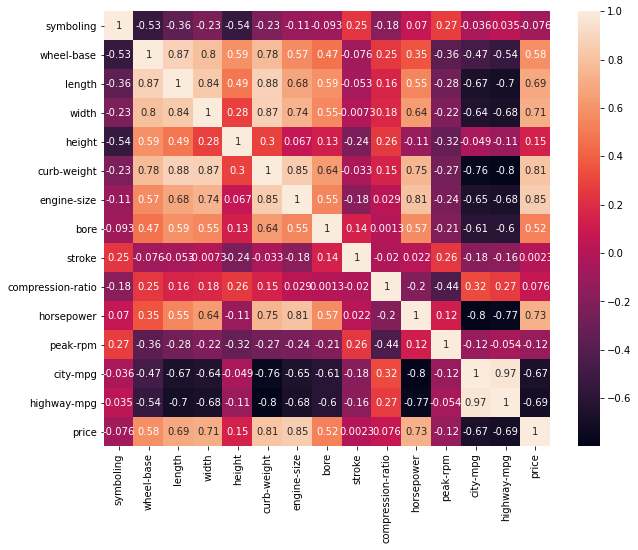

In [102]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

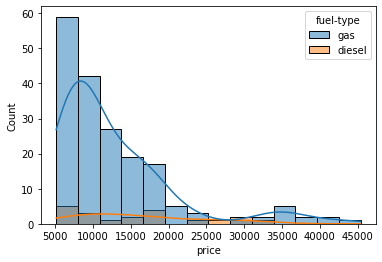

In [105]:
sns.histplot(data=df, x='price', hue='fuel-type', kde=True)

### Data Preprocessing

#### Prepare the Data

In [172]:
df2 = df[['wheel-base','length','width','height','curb-weight','engine-size','compression-ratio','city-mpg','highway-mpg','price']]
df2.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450.0


#### Scaling Data

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
scaler= MinMaxScaler()

In [175]:
kolom_scale = ['wheel-base','length','width','height','curb-weight','engine-size','compression-ratio', \
               'city-mpg','highway-mpg']

for i in kolom_scale:
    x_train[i] = scaler.fit_transform(np.array(x_train[i]).reshape(-1,1))

In [194]:
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))

### Model Building

**Split Data for Train and Test**

In [196]:
x = df[['wheel-base','length','width','height','curb-weight','engine-size','compression-ratio','city-mpg','highway-mpg']] #feature
y = df['price'] #target

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=99)

**Train the Model**

In [179]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [180]:
mlr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()

In [198]:
ridge.fit(x_train,y_train)

Ridge()

In [199]:
lasso.fit(x_train,y_train)

Lasso()

In [200]:
en.fit(x_train,y_train)

ElasticNet()

In [201]:
mlr.fit(x_train, y_train)

LinearRegression()

#### Test The Model

In [202]:
mlr_pred = mlr.predict(x_test)

In [203]:
ridge_pred = ridge.predict(x_test)

In [204]:
lasso_pred = lasso.predict(x_test)

In [205]:
en_pred = en.predict(x_test)

#### Model Result

In [207]:
eval = pd.DataFrame({'Actual': y_test, 'MultiLinear Regression': mlr_pred, 'Ridge Regression': ridge_pred, \
                     'Lasso Regression': lasso_pred, 'ElasticNet Regression': en_pred })
eval.head(10)

,Actual,MultiLinear Regression,Ridge Regression,Lasso Regression,ElasticNet Regression
71,34184.0,30684.497797,30683.349018,30682.098855,30645.453527
24,6229.0,5692.381587,5693.966276,5695.310850,5782.080783
51,6095.0,5826.605568,5827.392977,5826.097991,5867.800689
162,9258.0,8173.484511,8173.537775,8174.126396,8174.238988
97,7999.0,7359.670651,7359.092177,7359.154411,7330.543442
40,10295.0,10298.105727,10298.377290,10301.381012,10313.318642
124,12764.0,18530.424962,18529.610823,18530.337895,18490.030140
84,14489.0,18527.915244,18527.594490,18528.308099,18523.349296
142,7775.0,10045.022068,10043.555528,10043.577671,9961.172017
131,9895.0,13725.642081,13727.148585,13727.060997,13806.967423


#### Evaluate the Model

In [208]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [209]:
model = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']
model_pred = [mlr_pred, ridge_pred, lasso_pred, en_pred]
mae= []
mse = []
rmse = []
r2_score = []

for i in range(len(model)):
    mae.append(metrics.mean_absolute_error(y_test, model_pred[i]))
    mse.append(metrics.mean_squared_error(y_test, model_pred[i]))    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, model_pred[i])))    
    r2_score.append(metrics.r2_score(y_test, model_pred[i]))    

pd.DataFrame({'MAE': mae, 'MSE':mse, 'RMSE': rmse, 'R2_Score':r2_score}, index=model).sort_values('RMSE')

,MAE,MSE,RMSE,R2_Score
ElasticNet,2613.050190,1.307023e+07,3615.277902,0.730141
Ridge,2653.591299,1.342679e+07,3664.258338,0.722779
Lasso,2653.893994,1.342939e+07,3664.612761,0.722726
Linear Regression,2654.245825,1.343310e+07,3665.119977,0.722649


### Conclusion

From all of the steps conducted, we can conclude that Elastic Net Regression give us the best result among other algorithms tested. Nevertheless, there are still so much improvement area for this model such as Hyperparameter Tuning.